# Notes

# Preamble (must run)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from utils import read_stats, assign_channels, plot_kde, filter_df, add_jitter, purity_thresholds, bin_norm_heatmap, bin_wise_boxplot
import scipy
from itertools import combinations, product
from tqdm import tqdm
import traceback
import scipy.stats
import sklearn
import sklearn.metrics
import os
import pickle
import timeit
import skmisc.loess
plt.rcParams['figure.figsize'] = [10,10]
rng = np.random.default_rng()

# Define samples and channels (must run)

In [2]:
channels={1:'dump',2:'CTDR'}

samples=['1-1','1-2','1-3','2-1','2-2','2-3']

sample_dict={'1-1':'2-3','1-2':'2-2','1-3':'2-1','1-4':'1-1','1-5':'1-2','1-6':'1-3','1-7':'2-2','1-8':'2-1','1-9':'1-2','1-10':'1-1',
             '2-1':'1-2','2-2':'1-1','2-3':'1-3','2-4':'2-3','2-5':'2-2','2-6':'2-1','2-7':'2-3','2-8':'1-3','2-9':'1-2','2-10':'1-1','2-11':'2-1','2-12':'2-2'}

In [3]:
# os.listdir('..\\250104_flu')

# Import Segmentation Data  (must run)

In [4]:
imported=False

if not imported:
    cells={sample:[] for sample in samples}
    # for sample in samples:
    #     cells[f'{sample}_paracortex']=assign_channels(read_stats(f'..\\240727_ovakldh\\{sample}_paracortex_Statistics',grouped_images=False,verbose=False),channels)
    # for surface in cell_types.keys(): #import segmented Tconv Treg and migratory cell data
    temp_df=assign_channels(read_stats(f'..\\250113_mAPC_Statistics',grouped_images=True,verbose=False),channels)
    for name,group in temp_df.groupby('Original Image Name'):
        # print(name)
        sample_end=name[name.find('pt'):][2:] # part of the image name after 'Region'
        pt_idx=sample_end[0]
        sample_end=name[name.find('Region'):][7:]
        sample_idx=sample_end[:sample_end.find('Merged')][:-1] # part of the image name before 'Merged'
        print(f'{pt_idx}-{sample_idx}')
        cells[sample_dict[f'{pt_idx}-{sample_idx}']].append(group)
        
for sample in samples:
    cells[sample]=pd.concat(cells[sample])

#         cells[f'r{sample}_paracortex']=group
#     with open("250108_cell_data.pickle",'wb') as f:
#         pickle.dump(cells,f)
# else:
#     with open('250108_cell_data.pickle','rb') as f:
#         cells=pickle.load(f)

1-1
1-6
1-2
1-5
1-4
1-3
1-7
1-8
1-9
1-10
2-4
2-3
2-5
2-1
2-2
2-6
2-7
2-8
2-12
2-9
2-10
2-11


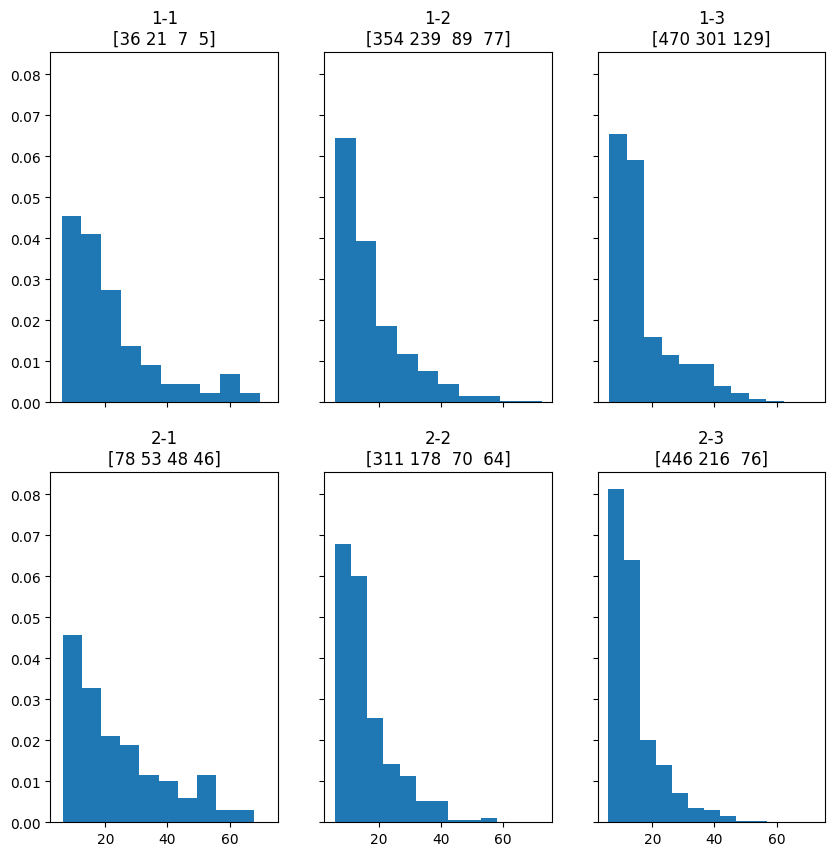

In [5]:
fig, axs=plt.subplots(2,3,sharex=True,sharey=True)

for i,sample in enumerate(samples):
    axi=(i//3,i%3)
    axs[axi].hist(cells[sample]['Intensity_Mean_CTDR'],density=True)
    axs[axi].set_title(sample+'\n'+str(cells[sample]['Original Image Name'].value_counts().values))